In [1]:
from henon_map_cpp.henon_map_engine import get_tunes
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_tune = 0.28
def func_signal(samples):
    v0 = base_tune
    v1 = 0.31
    b = 0.25
    x = np.sin(2 * np.pi * v0 * np.arange(samples))
    px = np.cos(2 * np.pi * v0 * np.arange(samples))

    x += b * np.sin(2 * np.pi * v1 * np.arange(samples))
    px += b * np.cos(2 * np.pi * v1 * np.arange(samples))

    for i in range(1, 5):
        x += np.exp(-i) * np.sin(2 * np.pi * v0 * np.arange(samples) * i)
        px += np.exp(-i) * np.cos(2 * np.pi * v0 * np.arange(samples) * i)

        x += np.exp(-i) * b * np.sin(2 * np.pi * v1 * np.arange(samples) * i)
        px += np.exp(-i) * b * np.cos(2 * np.pi * v1 * np.arange(samples) * i)
    
    return x, px

In [3]:
def birkhoff_weights(n):
    t = np.arange(n) / (n)
    weights = np.exp(-1/(t * (1 - t)))
    return weights / np.sum(weights)

In [4]:
signal_list = 2 ** np.arange(4, 20)
val_basic = []
val_interp_1 = []
val_interp_2 = []
on_python = []
for samples in signal_list:
    x, px = func_signal(samples)
    signal = x + 1j * px
    fft_basic = np.absolute(np.fft.fft(signal))
    val_basic.append((1-np.arange(samples)/samples)[np.argmax(fft_basic)])
    v1, v2 = get_tunes(x, px)
    val_interp_1.append(v1)
    val_interp_2.append(v2)

    angles = np.angle(signal)
    diff = np.diff(angles)
    diff[diff < 0] += 2 * np.pi
    diff *= birkhoff_weights(diff.size)
    on_python.append(1-np.sum(diff)/(2*np.pi))
    

val_basic = np.array(val_basic)
val_interp_1 = np.array(val_interp_1)
val_interp_2 = np.array(val_interp_2)
on_python = np.array(on_python)

val_basic = np.absolute(val_basic - base_tune)
val_interp_1 = np.absolute(val_interp_1 - base_tune)
val_interp_2 = np.absolute(val_interp_2 - base_tune)
on_python = np.absolute(on_python - base_tune)

/tmp/ipykernel_14564/2126043834.py:3: RuntimeWarning: divide by zero encountered in true_divide
  weights = np.exp(-1/(t * (1 - t)))


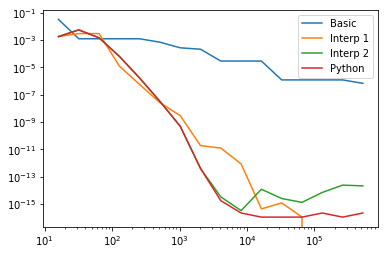

In [5]:
plt.plot(signal_list, val_basic, label='Basic')
plt.plot(signal_list, val_interp_1, label='Interp 1')
plt.plot(signal_list, val_interp_2, label='Interp 2')
plt.plot(signal_list, on_python, label='Python')
plt.legend()
plt.xscale("log")
plt.yscale("log")

In [6]:
def hanning(samples):
    return 2 * np.power(np.sin(np.pi * np.arange(samples) / samples), 2)

In [7]:
(
        (index / N) + (1 / (2*np.pi)) * np.arcsin(
            A(data[i1], data[i2], np.cos(2*np.pi/N)) * np.sin(2*np.pi/N)
        )
    )

NameError: name 'index' is not defined

In [ ]:
print(1 - 12/16)
print(1 - 13/16)
print(1 - 14/16)

0.25
0.1875
0.125


In [8]:
import henon_map_cpp as hm

In [27]:
x = np.linspace(0.1, 0.2, 10000)

In [28]:
engine = hm.henon_tracker(x, np.zeros_like(x), x, np.zeros_like(x), force_CPU=True)

CUDA devices available: 4


In [29]:
engine.compute_a_modulation(1000000, 0.168, 0.201, 16.0)

In [30]:
engine

In [31]:
engine.fft_tunes(1000000, 0.0, 10, 0.0)

Starting threads...
Returning results...


,from,to,tune_x,tune_y
0,0,1000000,"[0.16798668246709791, 0.167986675632951, 0.167...","[0.20095955658496545, 0.2009595511009019, 0.20..."


In [33]:
engine.reset()
engine.birkhoff_tunes(1000000, 0.0, 10, 0.0)

Starting threads...
Returning results...


,from,to,tune_x,tune_y
0,0,1000000,"[0.16798668246708537, 0.1679866756329561, 0.16...","[0.2009595565849639, 0.20095955110089614, 0.20..."
